
# Developing an AIML model which can predict the condition of the patient depending on the received test results obtained from the dataset

DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current  conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and  orientation of the condition to their body part.  

In [15]:
#select TensorFlow version 2.x in colab
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [16]:
# Initialize the random number generator
import random
random.seed(0)
# Ignore the warnings?
import warnings
warnings.filterwarnings("ignore")

In [17]:
# To establish the link between file present in drive and google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#import imantics
from PIL import Image
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Reading

# step -1: Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [19]:
# read the dataset and storing in variable
df1=pd.read_csv('/content/drive/MyDrive/CHEATES/Part1+-+Normal.csv')
df1.head() # to display top five rows of dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [20]:
# read the dataset and storing in variable
df2=pd.read_csv('/content/drive/MyDrive/CHEATES/Part1+-+Type_H.csv')
df2.head() # to display top five rows of dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [57]:
# read the dataset and storing in variable
df3=pd.read_csv('/content/drive/MyDrive/CHEATES/Part1+-+Type_S.csv')
df3.head() # to display top five rows of dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


# DATA PRE-PROCESSING

(i) Print Shape and columns of all the 3 DataFrames

In [22]:
df1.shape # to get the shape of given dataset

(100, 7)

In [23]:
df1.columns # to obtain the no.of columns or attributes of a given dataset

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [24]:
df2.shape# to get the shape of given dataset

(60, 7)

In [25]:
df2.columns# to obtain the no.of columns or attributes of a given dataset

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [26]:
df3.shape# to get the shape of given dataset

(150, 7)

In [58]:
df3.columns# to obtain the no.of columns or attributes of a given dataset

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

(ii) Compare Column names of all the 3 DataFrames

In [28]:
df1.columns.intersection(df2.columns) # to find the similarity of attributes that are present in two datasets

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

 or

In [29]:
df1.columns.difference(df2.columns) # to check weather there are different attributes are present in two datasets

Index([], dtype='object')

In [30]:
set(df1)-set(df2) # to check weather there are different attributes are present in two datasets

set()

  Its been observed that all the column names present in two database are equal.

In [31]:
df2.columns.intersection(df3.columns) # to find the similarity of attributes that are present in two datasets

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

    or

In [32]:
df1.columns.difference(df2.columns)# to check weather there are different attributes are present in two datasets

Index([], dtype='object')

 Its been observed that all the column names present in two database are equal.

In [33]:
df1.columns.intersection(df3.columns) # to find the similarity of attributes that are present in two datasets

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [34]:
df1.columns.difference(df2.columns)# to check weather there are different attributes are present in two datasets

Index([], dtype='object')

(iii) check the DataType of all the 3 DataFrames

In [35]:
df1.dtypes # to verify the datatype of each attribute

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [36]:
df1.info()# to verify the datatype and presence of null values of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [37]:
df2.dtypes# to verify the datatype of each attribute

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [38]:
df2.info()# to verify the datatype and presence of null values of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [39]:
df3.dtypes# to verify the datatype of each attribute

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [40]:
df3.info()# to verify the datatype and presence of null values of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


(iv) Observe the variation in ‘Class’ feature of all the 3 DataFrames

In [41]:
df1['Class'].value_counts() # to check the variation present in Class feature

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [42]:
df2['Class'].value_counts()# to check the variation present in Class feature

Type_H    37
type_h    23
Name: Class, dtype: int64

In [43]:
df3['Class'].value_counts()# to check the variation present in Class feature

Type_S    133
tp_s       17
Name: Class, dtype: int64

# Data Preparation and Exploration

(i) Unify all the variations in ‘Class’ feature for all the 3 DataFrames

For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’


In [44]:
df1.Class = df1.Class.str.replace('Nrmal','Normal') # to replace the class feature named 'Nrml' to 'Normal'
df1 # to display the dataset

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
96,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
97,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [45]:
df1['Class'].value_counts() # rechecking the variation present in Class feature

Normal    100
Name: Class, dtype: int64

In [46]:
df2.Class = df2.Class.str.replace('type_h','Type_H')# to replace the class feature named 'type_h' to 'Type_H'
df2

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [47]:
df2['Class'].value_counts()# rechecking the variation present in Class feature

Type_H    60
Name: Class, dtype: int64

In [48]:
df3.Class = df3.Class.str.replace('tp_s','Type_S')# to replace the class feature named 'tp_s' to 'Type_S'
df3

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [49]:
df3['Class'].value_counts()# rechecking the variation present in Class feature

Type_S    150
Name: Class, dtype: int64

(ii) Combine all the 3 DataFrames to form a single DataFrame

Checkpoint: Expected Output shape = (310,7)

In [50]:
frames = [df1,df2,df3]
dataframe=pd.concat(frames, ignore_index=True) # to combine all the dataframes
dataframe

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [51]:
dataframe.shape # to check the shape of combined dataframe

(310, 7)

(iii) Get random samples of this DataFrame

In [52]:
dataframe.sample(5) # to Print the 5 random samples of obtained DataFrame

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
290,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,Type_S
107,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
64,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,Normal
256,79.476978,26.732268,70.650982,52.744711,118.588669,61.700598,Type_S
158,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H


(iv) Check Feature-wise percentage of Null values.

In [53]:
dataframe.isnull().sum() # to verify the null values of each attribute

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [54]:
percent_missing = dataframe.isnull().sum() * 100 / len(dataframe) # to get the feature wise percentage of null values
percent_missing

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

(v) Check 5-point summary of the new DataFrame.

In [55]:
dataframe.describe() # to display the descriptive statistics

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Data Analysis USING VISULAIZATION

(i). Visualize a heatmap to understand correlation between all features

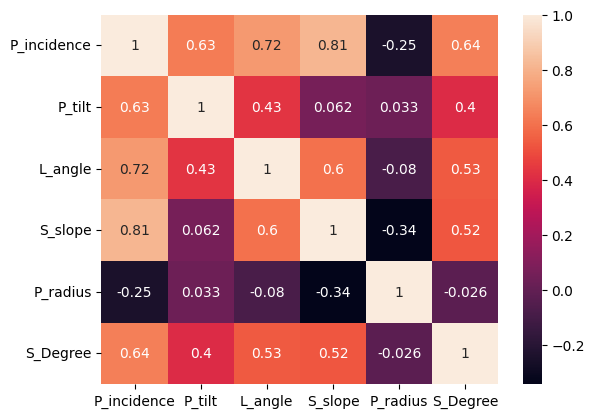

In [67]:
import seaborn as sns
sns.heatmap(dataframe.corr(),annot = True) #Visualizing the heatmap
plt.show()

In [69]:
dataframe.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


(i) Features having stronger correlation with correlation value.

In [70]:
dataframe.corr().max()

P_incidence    1.0
P_tilt         1.0
L_angle        1.0
S_slope        1.0
P_radius       1.0
S_Degree       1.0
dtype: float64

1. From the correlation matrix its been observed that there is strong correlation between an attribute with itself

2. High correlation is present between P_incidence and S_slope(0.814960)
3. Among all the attributes, P_incidence has high correlation with the remaining attributes except P_radius

(ii). Features having weaker correlation with correlation value

In [71]:
dataframe.corr().min()

P_incidence   -0.247467
P_tilt         0.032668
L_angle       -0.080344
S_slope       -0.342128
P_radius      -0.342128
S_Degree      -0.026065
dtype: float64

1. From the correlation matrix its been observed that there is a less correlation exist between S_slope and P_radius(-0.026065)
2. Among all the attributes, P_radius has less correlation with the remaining attributes

(iii) Visualize a pairplot with 3 classes distinguished by colors

In [72]:
dataframe # to display the complete dataframe

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [73]:
dataframe['Class'].value_counts() # rechecking the Class features of the dataframe

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

<Figure size 2000x1000 with 0 Axes>

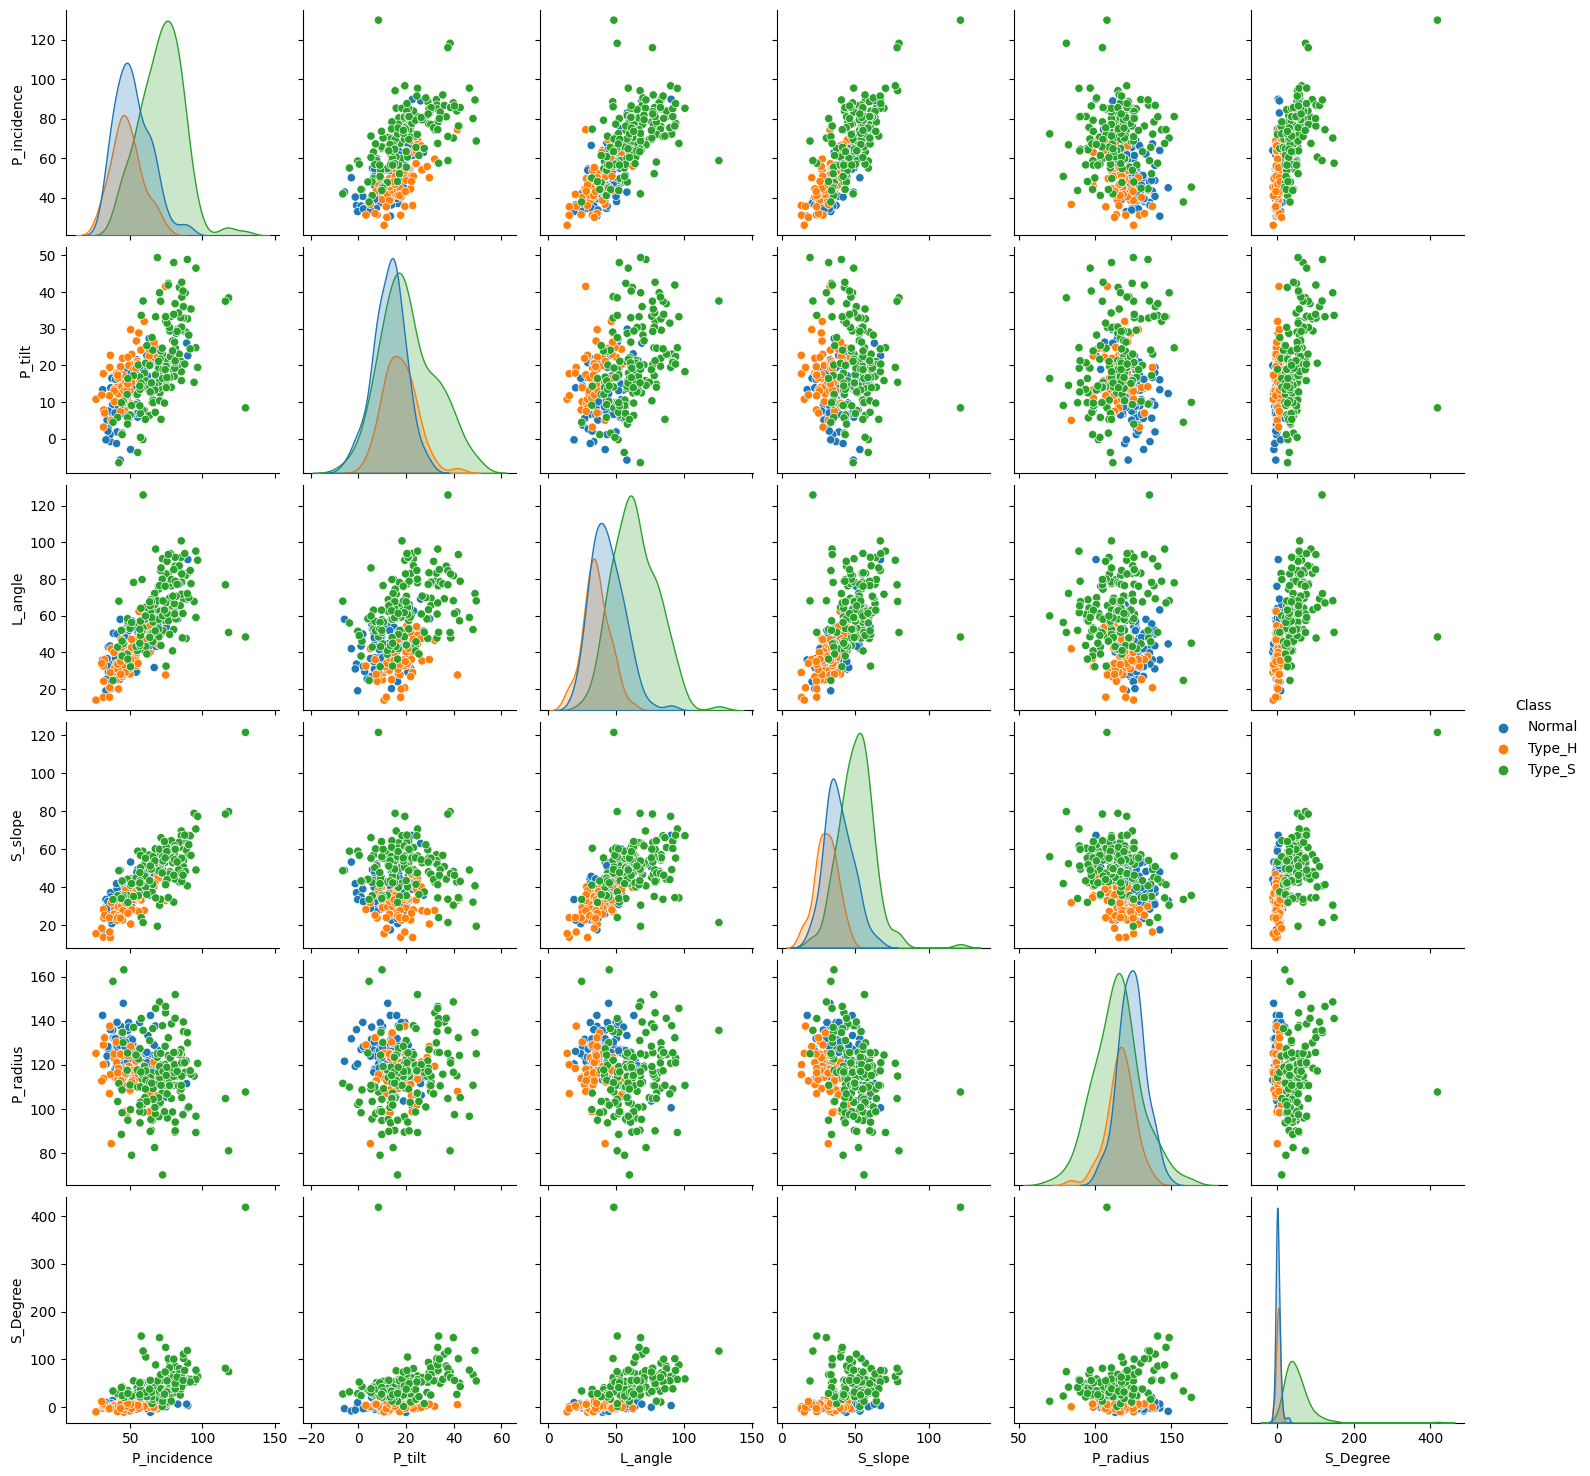

In [74]:
plt.figure(figsize=(20, 10))
sns.pairplot(dataframe,hue='Class') # to display the pairplot for all possible combinations of attributes
plt.show()

Its been observed that based on correation between different attributes, Type_S Class distribution is high as compared to Type_H with reference to normal i.e., most of the data consists of biomechanics features of Type_S

(iv )Visualize a jointplot for ‘P_incidence’ and ‘S_slope’

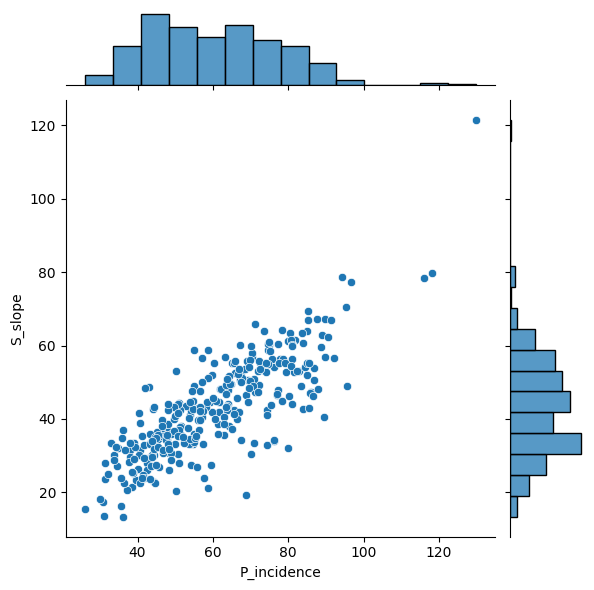

In [75]:
sns.jointplot(x="P_incidence", y="S_slope", data=dataframe)
plt.show()

There is almost a linear relationship i.e., high correlation (0.814960) is exists between  P_incidence and S-slope

(v)  Visualize a boxplot to check distribution of the features

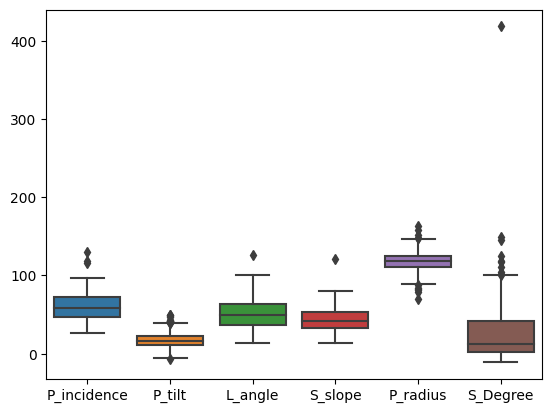

In [76]:
sns.boxplot(data=dataframe)
plt.show()

Its been observed that for each atrribute, outliers are present but removing of these attributes won't effect our model performance.

#  Model Building

# (i). Split data into X and Y

In [77]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore


In [78]:
dataframe # to display the dataframe

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [79]:
dataframe['Class'].value_counts() #verifying the different calss features

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [80]:
dataframe.tail() # to display the bottom five observations of the dataframe

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [81]:
dataframe.groupby(['Class']).count() # considering the Class feature as dependent variable by seperating from the remaining attributes

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [82]:
# Create a separate dataframe consisting only of the features i.e independent variables
X = dataframe.drop(labels= "Class" , axis = 1)
y = dataframe["Class"] # dependent variable
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [83]:
X.describe() # to check the descriptive statistics

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# (ii)Split data into train and test with 80:20 proportion.

In [84]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
print(X_train.shape)
print(y_train.shape)

(248, 6)
(248,)


In [86]:
print(X_test.shape)
print(y_test.shape)

(62, 6)
(62,)


# (iii).  Train a Supervised Learning Classification base model using KNN classifier

In [87]:
NNH = KNeighborsClassifier(n_neighbors= 15, weights = 'distance' ) # no.of nearest neighbours choosen as 15 because its a square root of size of total observations
NNH.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15, weights='distance')

In [88]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8064516129032258

Therefore, we got the Score of KNN classifier by choosing square root of total observations

# (iv). performance metrics for both train and test data

Confusion Matrix


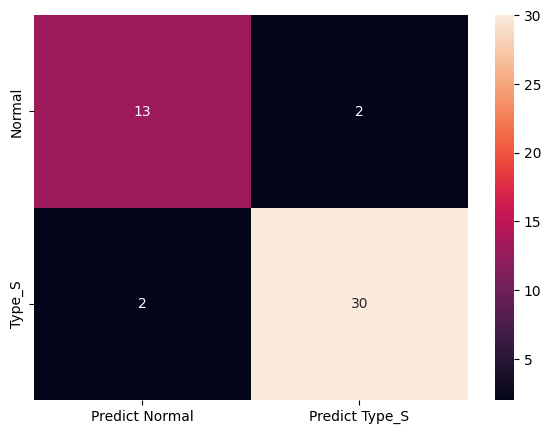

In [89]:
# calculate accuracy measures and confusion matrix of Class "Normal" with "Type_s"
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal", "Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal", "Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

Confusion Matrix


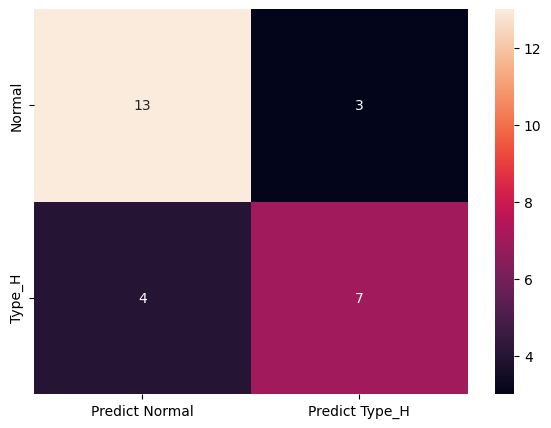

In [90]:
# calculate accuracy measures and confusion matrix of Class "Normal" with "Type_H"
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal","Type_H"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [91]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

      Normal       0.68      0.72      0.70        18
      Type_H       0.64      0.64      0.64        11
      Type_S       0.94      0.91      0.92        33

    accuracy                           0.81        62
   macro avg       0.75      0.76      0.75        62
weighted avg       0.81      0.81      0.81        62



# Performance Improvement

In [92]:
NNH = KNeighborsClassifier(n_neighbors= 5, weights = 'distance' ) # checking KNN score with 5 nearest neighbours
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8548387096774194

In [93]:

NNH = KNeighborsClassifier(n_neighbors= 1, weights = 'distance' ) # checking KNN score with 1 nearest neighbours
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9032258064516129

In [94]:
NNH = KNeighborsClassifier(n_neighbors= 3, weights = 'distance' ) # checking KNN score with 3 nearest neighbours
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8548387096774194

In [95]:
# to check the KNN scores for different values of k
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

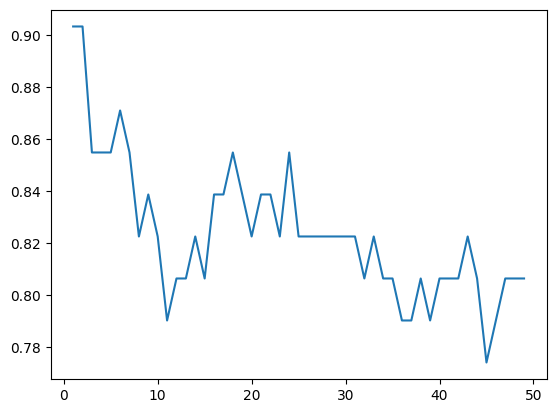

In [96]:
plt.plot(range(1,50),scores) # checking KNN score variation with different values of k nearest neighbours
plt.show()